# OLS cont'd

Steps:
1. Get the problem
2. Get homogeneous dataset
3. Clean it
4. Do some descriptive/inferential analysis
5. Build model
6. Check for assumptions

The goal of Ordinary Least Squares is to predict continuous process. 

Assumptions:
1. Linearity
2. No autocorrelation
3. No multicolinearity (independent Xs)
4. Homoskedasticity
5. Exogeneity of residuals : 
 * E(residuals)=0
 * Var(residuals)=const
 * cov(residuals, Xs)=0

$y=2.5+1.25x_1-6x_2+8x_3$

1. If $x_1$,$x_2$ and $x_3$ at the same time are equal to 0, y is equal to 2.5
2. If $x_1$ increases by 1 having the rest being the same, y increases by 1.25
3. If $x_2$ increases by 1 having the rest being the same, y decreases by 6
4. If $x_3$ increases by 1 having the rest being the same, y increases by 8

Age vs Salary

$Salary=const + ß_1Age + ß_2*Age²$

$y = ß_0 + ß_1x_1+ß_2x_2+ß_3x_1x_2$

# Load data

In [1]:
import pandas as pd

In [2]:
X=pd.read_csv('clean_data.csv')

In [3]:
X.head()

,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,...,Fence_MnWw,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone
0,65.0,8450,0,0,0,7,5,196.0,4,3,...,0,0,1,0,0,0,0,0,1,0
1,80.0,9600,0,0,0,6,8,0.0,3,3,...,0,0,1,0,0,0,0,0,0,0
2,68.0,11250,1,0,0,7,5,162.0,4,3,...,0,0,1,0,0,0,0,0,1,0
3,60.0,9550,1,0,0,7,5,0.0,3,3,...,0,0,0,0,0,0,1,0,0,0
4,84.0,14260,1,0,0,8,5,350.0,4,3,...,0,0,1,0,0,0,0,0,1,0


In [4]:
y=pd.read_csv('SalePrice.csv')

In [5]:
import statsmodels.api as sm
# you can read the model using code below. 
fitted_model=sm.load('fitted_model.pickle')
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     191.4
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        01:34:24   Log-Likelihood:                -17072.
No. Observations:                1460   AIC:                         3.424e+04
Df Residuals:                    1411   BIC:                         3.450e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -8.437e+04   1.16e+04     -7.259      0.000   -1.07e+05   -6.16e+04
LotArea                  0.3404      0.094      3.621      0.000       0.156       0.525
OverallQual           9850.1692   1118.933      8.803      0.000    7655.217     1.2e+04
OverallCond           3973.6742    804.869      4.937      0.000    2394.806    5552.543
MasVnrArea              26.7252      6.108      4.375      0.000      14.743      38.707
ExterQual             6353.0740   2383.558      2.665      0.008    1677.375     1.1e+04
BsmtQual              8072.9156   1414.867      5.706      0.000    5297.446    1.08e+04
BsmtExposure          7183.3541    921.692      7.794      0.000    5375.320    8991.388
2ndFlrSF                14.1006      5.610      2.513      0.012       3.096      25.106
GrLivArea               44.2771      4.185     10.580      0.000      36.068      52.486
BsmtFullBath          6238.5254   1887.890      3.304      0.001    2535.152    9941.899
FullBath              8044.7842   2387.309      3.370      0.001    3361.728    1.27e+04
HalfBath              6647.8086   2309.479      2.878      0.004    2117.426    1.12e+04
BedroomAbvGr         -5642.7353   1514.773     -3.725      0.000   -8614.185   -2671.286
KitchenAbvGr         -2.003e+04   4270.692     -4.690      0.000   -2.84e+04   -1.17e+04
KitchenQual           8339.3855   1862.722      4.477      0.000    4685.383     1.2e+04
TotRmsAbvGrd          3145.0915   1068.367      2.944      0.003    1049.332    5240.851
Functional           -3790.3634   1250.809     -3.030      0.002   -6244.008   -1336.719
Fireplaces            4028.4370   1520.415      2.650      0.008    1045.920    7010.954
GarageCars            7961.0772   1457.560      5.462      0.000    5101.859    1.08e+04
ScreenPorch             44.3890     14.350      3.093      0.002      16.239      72.539
BsmtFinTypeALQ        6660.5551   2303.907      2.891      0.004    2141.103    1.12e+04
BsmtFinTypeGLQ        1.022e+04   2250.698      4.541      0.000    5804.745    1.46e+04
LandContour_HLS        1.94e+04   5460.240      3.552      0.000    8685.674    3.01e+04
LandContour_Lvl        1.18e+04   3498.109      3.373      0.001    4938.221    1.87e+04
LotConfig_CulDSac     1.098e+04   3293.858      3.334      0.001    4520.940    1.74e+04
BldgType_Twnhs       -4.078e+04   5339.841     -7.636      0.000   -5.13e+04   -3.03e+04
BldgType_TwnhsE      -3.467e+04   3610.241     -9.603      0.000   -4.18e+04   -2.76e+04
HouseStyle_1Story     2.071e+04   2918.928      7.095      0.000     1.5e+04    2.64e+04
HouseStyle_2Story    -8307.5188   3312.623     -2.508      0.012   -1.48e+04   -1809.323
Heating_OthW         -5.303e+04   2.13e+04     -2.494      0.013   -9.47e+04   -1.13e+04
MasVnrType_BrkFace   -6281.3046   2203.169     -2.851    

In [6]:
fitted_model.params.index[1:]

Index(['LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual',
       'BsmtQual', 'BsmtExposure', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'ScreenPorch',
       'BsmtFinTypeALQ', 'BsmtFinTypeGLQ', 'LandContour_HLS',
       'LandContour_Lvl', 'LotConfig_CulDSac', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'HouseStyle_1Story', 'HouseStyle_2Story',
       'Heating_OthW', 'MasVnrType_BrkFace', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr',
       'Neighborhood_Timber'],
      dt

In [7]:
X_best=X[fitted_model.params.index[1:]]

In [8]:
X_best.shape

(1460, 48)

In [9]:
from statsmodels.tools.tools import add_constant

In [10]:
sm.OLS(y,add_constant(X_best)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     190.8
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        01:34:26   Log-Likelihood:                -17074.
No. Observations:                1460   AIC:                         3.425e+04
Df Residuals:                    1411   BIC:                         3.451e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -8.483e+04   1.16e+04     -7.289      0.000   -1.08e+05    -6.2e+04
LotArea                  0.3457      0.094      3.674      0.000       0.161       0.530
OverallQual           9851.2346   1120.519      8.792      0.000    7653.171     1.2e+04
OverallCond           3883.7263    806.062      4.818      0.000    2302.517    5464.936
MasVnrArea              26.9510      6.116      4.407      0.000      14.954      38.948
ExterQual             6720.9406   2386.693      2.816      0.005    2039.092    1.14e+04
BsmtQual              8038.8515   1418.440      5.667      0.000    5256.374    1.08e+04
BsmtExposure          7028.6623    933.949      7.526      0.000    5196.585    8860.740
2ndFlrSF                12.9611      5.595      2.317      0.021       1.986      23.936
GrLivArea               44.2019      4.193     10.541      0.000      35.976      52.428
BsmtFullBath          6123.7786   1892.523      3.236      0.001    2411.317    9836.240
FullBath              7976.3475   2390.475      3.337      0.001    3287.081    1.27e+04
HalfBath              6788.5653   2313.750      2.934      0.003    2249.806    1.13e+04
BedroomAbvGr         -5706.9860   1516.685     -3.763      0.000   -8682.186   -2731.786
KitchenAbvGr         -1.987e+04   4276.346     -4.647      0.000   -2.83e+04   -1.15e+04
KitchenQual           8368.5951   1865.321      4.486      0.000    4709.494     1.2e+04
TotRmsAbvGrd          3233.9815   1070.130      3.022      0.003    1134.764    5333.199
Functional           -3645.8141   1253.198     -2.909      0.004   -6104.147   -1187.482
Fireplaces            3865.0417   1522.841      2.538      0.011     877.765    6852.318
GarageCars            7814.0656   1460.545      5.350      0.000    4948.992    1.07e+04
ScreenPorch             44.0378     14.371      3.064      0.002      15.846      72.229
BsmtFinTypeALQ        6844.8183   2305.500      2.969      0.003    2322.243    1.14e+04
BsmtFinTypeGLQ        1.025e+04   2254.592      4.544      0.000    5822.724    1.47e+04
LandContour_HLS       1.891e+04   5470.152      3.458      0.001    8184.231    2.96e+04
LandContour_Lvl       1.139e+04   3498.582      3.255      0.001    4524.515    1.83e+04
LotConfig_CulDSac     1.068e+04   3299.299      3.237      0.001    4208.688    1.72e+04
BldgType_Twnhs       -4.047e+04   5348.523     -7.566      0.000    -5.1e+04      -3e+04
BldgType_TwnhsE      -3.447e+04   3615.121     -9.534      0.000   -4.16e+04   -2.74e+04
HouseStyle_1Story     2.007e+04   2908.026      6.902      0.000    1.44e+04    2.58e+04
HouseStyle_2Story    -8231.8223   3317.193     -2.482      0.013   -1.47e+04   -1724.662
Heating_OthW         -5.204e+04   2.13e+04     -2.444      0.015   -9.38e+04   -1.03e+04
MasVnrType_BrkFace   -6116.7988   2206.053     -2.773    

# Assumptions
## Multicollinearity

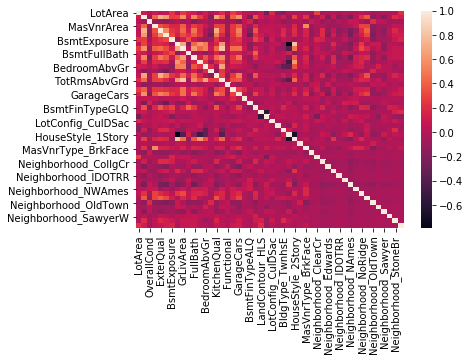

In [11]:
import seaborn as sns
sns.heatmap(X_best.corr())

Variance Inflation Factor

$VIF=1/(1-R²_j)$

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [13]:
X1=add_constant(X_best)

In [14]:
vifs=pd.Series([VIF(X1.values,i) for i in range(X1.shape[1])],index=X1.columns)

In [15]:
vifs=pd.Series([VIF(X_best.values,i) for i in range(X_best.shape[1])],index=X_best.columns)

In [16]:
vifs[vifs>10]

OverallQual         80.874705
OverallCond         30.226861
ExterQual          105.075171
BsmtQual            39.845733
2ndFlrSF            16.307589
GrLivArea           74.503078
FullBath            26.231143
BedroomAbvGr        32.649980
KitchenAbvGr        27.886718
KitchenQual         72.959709
TotRmsAbvGrd        86.349741
GarageCars          13.153059
LandContour_Lvl     17.519035
dtype: float64

In [17]:
def func(column, X):
    if column:
        X=X.drop(column, axis=1)
    vifs=pd.Series([VIF(X.values,i) for i in range(X.shape[1])],index=X.columns)
    display(vifs[vifs>10])
    return X

In [18]:
X2=X_best.copy()

In [31]:
X2=func('LandContour_Lvl',X2)

Series([], dtype: float64)

In [32]:
X2.shape

(1460, 37)

In [33]:
X_best.shape

(1460, 48)

No more Multicollinearity

In [34]:
sm.OLS(y,add_constant(X2)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     128.2
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        01:36:00   Log-Likelihood:                -17473.
No. Observations:                1460   AIC:                         3.502e+04
Df Residuals:                    1422   BIC:                         3.522e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 9.858e+04   5791.605     17.021      0.000    8.72e+04     1.1e+05
LotArea                  0.4175      0.119      3.509      0.000       0.184       0.651
MasVnrArea              51.7577      7.864      6.582      0.000      36.332      67.183
BsmtExposure          1.164e+04   1186.846      9.807      0.000    9310.657     1.4e+04
2ndFlrSF                80.2863      5.593     14.354      0.000      69.314      91.259
BsmtFullBath          9685.7780   2333.271      4.151      0.000    5108.755    1.43e+04
HalfBath              4477.1479   2805.386      1.596      0.111   -1025.992    9980.288
Functional           -1961.8583   1564.794     -1.254      0.210   -5031.411    1107.694
Fireplaces            1.659e+04   1858.191      8.929      0.000    1.29e+04    2.02e+04
GarageCars            2.326e+04   1765.556     13.175      0.000    1.98e+04    2.67e+04
ScreenPorch             55.3177     18.764      2.948      0.003      18.511      92.125
BsmtFinTypeALQ       -4101.0643   2768.996     -1.481      0.139   -9532.820    1330.692
BsmtFinTypeGLQ        1.436e+04   2735.384      5.249      0.000    8991.415    1.97e+04
LandContour_HLS       4288.4388   5897.281      0.727      0.467   -7279.866    1.59e+04
LotConfig_CulDSac     1.315e+04   4305.501      3.054      0.002    4703.089    2.16e+04
BldgType_Twnhs       -5.296e+04   6854.862     -7.725      0.000   -6.64e+04   -3.95e+04
BldgType_TwnhsE      -4.179e+04   4442.019     -9.408      0.000   -5.05e+04   -3.31e+04
HouseStyle_1Story      3.39e+04   3655.810      9.274      0.000    2.67e+04    4.11e+04
HouseStyle_2Story    -2.165e+04   4219.086     -5.132      0.000   -2.99e+04   -1.34e+04
Heating_OthW         -2.498e+04   2.77e+04     -0.902      0.367   -7.93e+04    2.93e+04
MasVnrType_BrkFace   -7640.4339   2869.449     -2.663      0.008   -1.33e+04   -2011.626
Neighborhood_BrkSide -5.017e+04   6414.641     -7.822      0.000   -6.28e+04   -3.76e+04
Neighborhood_ClearCr -4.601e+04   8485.323     -5.422      0.000   -6.27e+04   -2.94e+04
Neighborhood_CollgCr -2.389e+04   4632.083     -5.157      0.000    -3.3e+04   -1.48e+04
Neighborhood_Edwards -5.605e+04   5322.423    -10.532      0.000   -6.65e+04   -4.56e+04
Neighborhood_Gilbert -3.718e+04   5508.421     -6.750      0.000    -4.8e+04   -2.64e+04
Neighborhood_IDOTRR   -6.82e+04   7505.312     -9.086      0.000   -8.29e+04   -5.35e+04
Neighborhood_Mitchel -4.759e+04   6552.017     -7.264      0.000   -6.04e+04   -3.47e+04
Neighborhood_NAmes   -4.952e+04   4393.062    -11.273      0.000   -5.81e+04   -4.09e+04
Neighborhood_NWAmes  -3.464e+04   5755.995     -6.018      0.000   -4.59e+04   -2.34e+04
Neighborhood_NoRidge  3.289e+04   7431.175      4.426      0.000    1.83e+04    4.75e+04
Neighborhood_NridgHt  5.965e+04   5591.554     10.668    

In [35]:
def func_p(column, X):
    if column:
        X=X.drop(column, axis=1)
    mod=sm.OLS(y,add_constant(X)).fit()
    display(mod.summary())
    return X

In [36]:
drop_cols=[]

In [41]:
drop_cols.append('Heating_OthW')
X2=func_p(drop_cols[-1],X2)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     147.7
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        01:36:48   Log-Likelihood:                -17477.
No. Observations:                1460   AIC:                         3.502e+04
Df Residuals:                    1427   BIC:                         3.519e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 9.894e+04   5732.907     17.258      0.000    8.77e+04     1.1e+05
LotArea                  0.4077      0.119      3.426      0.001       0.174       0.641
MasVnrArea              52.4633      7.866      6.669      0.000      37.032      67.894
BsmtExposure          1.166e+04   1177.814      9.899      0.000    9348.676     1.4e+04
2ndFlrSF                82.1161      5.468     15.017      0.000      71.389      92.843
BsmtFullBath          9585.0727   2308.117      4.153      0.000    5057.405    1.41e+04
Fireplaces            1.656e+04   1854.255      8.929      0.000    1.29e+04    2.02e+04
GarageCars             2.34e+04   1764.716     13.259      0.000    1.99e+04    2.69e+04
ScreenPorch             57.4021     18.730      3.065      0.002      20.661      94.143
BsmtFinTypeGLQ        1.478e+04   2684.745      5.507      0.000    9517.292    2.01e+04
LotConfig_CulDSac     1.314e+04   4306.485      3.052      0.002    4694.909    2.16e+04
BldgType_Twnhs       -5.398e+04   6834.471     -7.899      0.000   -6.74e+04   -4.06e+04
BldgType_TwnhsE       -4.21e+04   4440.593     -9.481      0.000   -5.08e+04   -3.34e+04
HouseStyle_1Story     3.362e+04   3644.753      9.224      0.000    2.65e+04    4.08e+04
HouseStyle_2Story    -2.041e+04   4137.668     -4.932      0.000   -2.85e+04   -1.23e+04
MasVnrType_BrkFace   -7306.2742   2866.774     -2.549      0.011   -1.29e+04   -1682.731
Neighborhood_BrkSide  -5.19e+04   6363.814     -8.155      0.000   -6.44e+04   -3.94e+04
Neighborhood_ClearCr -4.781e+04   8440.850     -5.665      0.000   -6.44e+04   -3.13e+04
Neighborhood_CollgCr -2.429e+04   4612.511     -5.266      0.000   -3.33e+04   -1.52e+04
Neighborhood_Edwards -5.811e+04   5260.116    -11.046      0.000   -6.84e+04   -4.78e+04
Neighborhood_Gilbert  -3.63e+04   5502.791     -6.597      0.000   -4.71e+04   -2.55e+04
Neighborhood_IDOTRR  -6.927e+04   7482.659     -9.258      0.000    -8.4e+04   -5.46e+04
Neighborhood_Mitchel -4.964e+04   6506.939     -7.629      0.000   -6.24e+04   -3.69e+04
Neighborhood_NAmes   -5.066e+04   4367.883    -11.599      0.000   -5.92e+04   -4.21e+04
Neighborhood_NWAmes  -3.591e+04   5702.530     -6.297      0.000   -4.71e+04   -2.47e+04
Neighborhood_NoRidge  3.263e+04   7420.573      4.397      0.000    1.81e+04    4.72e+04
Neighborhood_NridgHt  5.947e+04   5574.741     10.668      0.000    4.85e+04    7.04e+04
Neighborhood_OldTown -6.212e+04   5155.363    -12.050      0.000   -7.22e+04    -5.2e+04
Neighborhood_SWISU   -4.859e+04   8750.193     -5.552      0.000   -6.57e+04   -3.14e+04
Neighborhood_Sawyer  -5.353e+04   5753.871     -9.304      0.000   -6.48e+04   -4.22e+04
Neighborhood_SawyerW -2.991e+04   5971.414     -5.009      0.000   -4.16e+04   -1.82e+04
Neighborhood_StoneBr  6.487e+04   8461.721      7.666    

In [42]:
# Just to be sure let's test for multicollinearity once again
X2=func('',X2)

Series([], dtype: float64)

Now we have checked the Multicollinearity Assumption. We dropped all columns that were highly correlated with others and we dropped the unsignificant ones.

## Autocorrelation - when rows are correlated

Durbin Watson test

In [43]:
from statsmodels.stats.stattools import durbin_watson

In [44]:
mod=sm.OLS(y,add_constant(X2)).fit()
resid=mod.resid

In [45]:
durbin_watson(resid)

1.9419070616041152

For Durbin Watson statistics we have the following tresholds:

* Normally it is between 0 and 4
* If the value is lower than 1.5 than positive autocorrelation
* If the value is higher than 2.5 than negative autocorrelation
* Else - no autocorrelation

So, we need to get the value between 1.5 and 2.5. Ideally as close as possible to 2. Which is the case here

Assumption is satisfied. No autocorrelation found

## Linearity

In [46]:
X2.nunique()[X2.nunique()>2].index

Index(['LotArea', 'MasVnrArea', 'BsmtExposure', '2ndFlrSF', 'BsmtFullBath',
       'Fireplaces', 'GarageCars', 'ScreenPorch'],
      dtype='object')

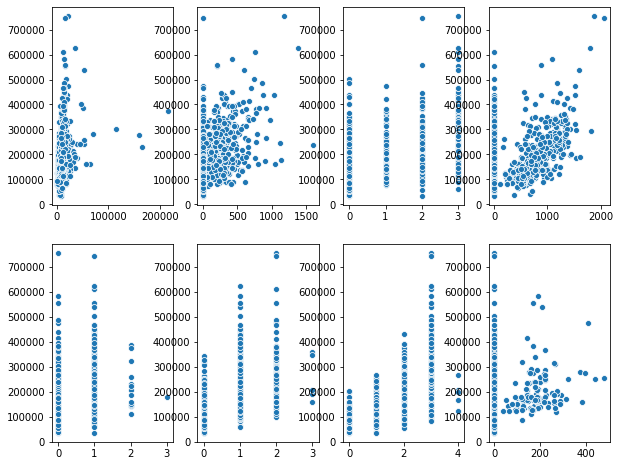

In [47]:
import matplotlib.pyplot as plt

_,axes=plt.subplots(2,4,figsize=(10,8))
for idx,col in enumerate(X2.nunique()[X2.nunique()>2].index):
    sns.scatterplot(x=X2[col].values,y=y.values.ravel(), ax=axes[idx//4, idx%4])
    

In [48]:
y_pred=mod.predict(add_constant(X2))

In [49]:
y_pred

0       201957.028370
1       234804.079799
2       230516.405199
3       240842.215709
4       348939.560130
            ...      
1455    165801.220488
1456    197760.037823
1457    248112.927495
1458    145283.897110
1459    111488.434014
Length: 1460, dtype: float64

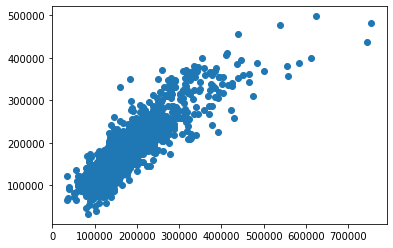

In [50]:
plt.scatter(y, y_pred)

In [51]:
data=pd.concat([y,y_pred],axis=1)

In [52]:
data.columns=['SalePrice','Pred']

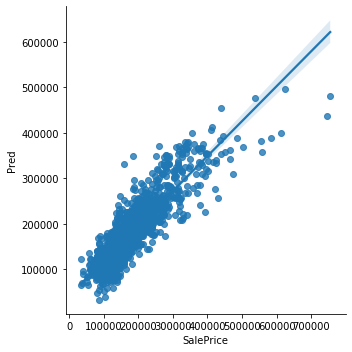

In [53]:
sns.lmplot(x='SalePrice', y='Pred', data=data)

In [54]:
from statsmodels.stats.diagnostic import linear_harvey_collier

In [55]:
linear_harvey_collier(mod)

LinAlgError: Singular matrix

In [56]:
dummies=X2.nunique()[X2.nunique()==2].index

In [57]:
X2[dummies].sum(axis=1).max()

5.0

In [58]:
X2[dummies].sum(axis=1).min()

0.0

Conclusion: 

We can clearly see that there is some kind of issue. We don't have a dummies trap (because we have a row with all zeroes in dummies). And at the same time our test failed to run.

But, we could see that predictions are aligned with actual data. So there is a chance that we are still ok. Let's continue

## Homoskedasticity

In [59]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [60]:
lnames=['Lagrange Multiplier', 'pvalue for LM','F stats','pvalue for Fstats']
{lnames[idx]:het_breuschpagan(resid,X2)[idx] for idx in range(4)}

{'Lagrange Multiplier': 379.84915176690583,
 'pvalue for LM': 1.1632811910472686e-61,
 'F stats': 15.692964020096051,
 'pvalue for Fstats': 3.774353280938404e-72}

We pay our attention on pvalues again. The Null Hypothesis in both cases is:

H0: the variance of residuals doesnt depend on Xs.  (Homoskedasticity)

H1: Heteroskedasticity

Since in this case both values are 0, we reject Null Hypothesis and we end up in Heteroskedasticity. Assumption is violated

Possible solutions? 
1. try to build different model with different set of features trying to make it work.
2. Split your data into different sets. And build separate model for each set. (Apartment in Paris and apartment in Bordeaux will cost differently) + (outliers in Bronx and outliers in Brooklyn are different. What can be considered as outlier in one area is not outlier for second). 
3. Non-linearly transform our data. 

### Example of nonlinear transformation

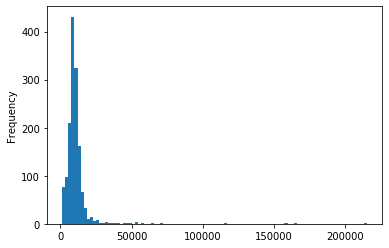

In [61]:
X2.LotArea.plot.hist(bins=100)

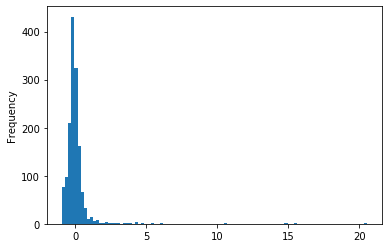

In [62]:
# Linear one:
((X2.LotArea-X2.LotArea.mean())/X2.LotArea.std()).plot.hist(bins=100)

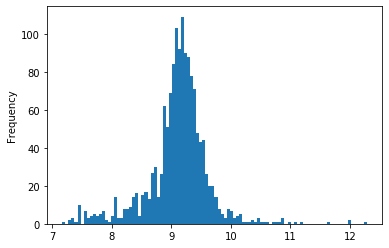

In [63]:
import numpy as np
X2.LotArea.apply(np.log).plot.hist(bins=100)

In [64]:
y.describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


In [65]:
X2.describe()

,LotArea,MasVnrArea,BsmtExposure,2ndFlrSF,BsmtFullBath,Fireplaces,GarageCars,ScreenPorch,BsmtFinTypeGLQ,LotConfig_CulDSac,...,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_StoneBr,Neighborhood_Timber
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.00000,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,103.117123,0.656164,346.992466,0.425342,0.613014,1.767123,15.060959,0.321233,0.064384,...,0.154110,0.05000,0.028082,0.05274,0.077397,0.017123,0.050685,0.040411,0.017123,0.026027
std,9981.264932,180.731373,1.039123,436.528436,0.518911,0.644666,0.747315,55.757415,0.467110,0.245519,...,0.361177,0.21802,0.165264,0.22359,0.267312,0.129775,0.219429,0.196989,0.129775,0.159271
min,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7553.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9478.500000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11601.500000,164.250000,1.000000,728.000000,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,215245.000000,1600.000000,3.000000,2065.000000,3.000000,3.000000,4.000000,480.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
y_new=(y-y.mean())/y.std()

In [67]:
X2_new=(X2-X2.mean())/X2.std()

In [68]:
X2_new

,LotArea,MasVnrArea,BsmtExposure,2ndFlrSF,BsmtFullBath,Fireplaces,GarageCars,ScreenPorch,BsmtFinTypeGLQ,LotConfig_CulDSac,...,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_StoneBr,Neighborhood_Timber
0,-0.207071,0.513928,-0.63146,1.161454,1.107431,-0.950901,0.311618,-0.270116,1.453120,-0.262234,...,-0.426687,-0.229337,-0.169923,-0.235877,-0.289539,-0.131946,-0.230986,-0.205144,-0.131946,-0.163415
1,-0.091855,-0.570555,2.25559,-0.794891,-0.819684,0.600289,0.311618,-0.270116,-0.687703,-0.262234,...,-0.426687,-0.229337,-0.169923,-0.235877,-0.289539,-0.131946,-0.230986,-0.205144,-0.131946,-0.163415
2,0.073455,0.325803,0.33089,1.188943,1.107431,0.600289,0.311618,-0.270116,1.453120,-0.262234,...,-0.426687,-0.229337,-0.169923,-0.235877,-0.289539,-0.131946,-0.230986,-0.205144,-0.131946,-0.163415
3,-0.096864,-0.570555,-0.63146,0.936955,1.107431,0.600289,1.649742,-0.270116,-0.687703,-0.262234,...,-0.426687,-0.229337,-0.169923,-0.235877,-0.289539,-0.131946,-0.230986,-0.205144,-0.131946,-0.163415
4,0.375020,1.366021,1.29324,1.617323,1.107431,0.600289,1.649742,-0.270116,1.453120,-0.262234,...,-0.426687,-0.229337,5.880991,-0.235877,-0.289539,-0.131946,-0.230986,-0.205144,-0.131946,-0.163415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.260471,-0.570555,-0.63146,0.794925,-0.819684,0.600289,0.311618,-0.270116,-0.687703,-0.262234,...,-0.426687,-0.229337,-0.169923,-0.235877,-0.289539,-0.131946,-0.230986,-0.205144,-0.131946,-0.163415
1456,0.266316,0.087881,-0.63146,-0.794891,1.107431,2.151479,0.311618,-0.270116,-0.687703,-0.262234,...,-0.426687,4.357406,-0.169923,-0.235877,-0.289539,-0.131946,-0.230986,-0.205144,-0.131946,-0.163415
1457,-0.147760,-0.570555,-0.63146,1.844112,-0.819684,2.151479,-1.026506,-0.270116,1.453120,-0.262234,...,-0.426687,-0.229337,-0.169923,-0.235877,-0.289539,-0.131946,-0.230986,-0.205144,-0.131946,-0.163415
1458,-0.080133,-0.570555,0.33089,-0.794891,1.107431,-0.950901,-1.026506,-0.270116,1.453120,-0.262234,...,2.342035,-0.229337,-0.169923,-0.235877,-0.289539,-0.131946,-0.230986,-0.205144,-0.131946,-0.163415


In [69]:
X2

,LotArea,MasVnrArea,BsmtExposure,2ndFlrSF,BsmtFullBath,Fireplaces,GarageCars,ScreenPorch,BsmtFinTypeGLQ,LotConfig_CulDSac,...,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_StoneBr,Neighborhood_Timber
0,8450,196.0,0.0,854,1,0,2,0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
1,9600,0.0,3.0,0,0,1,2,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,11250,162.0,1.0,866,1,1,2,0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
3,9550,0.0,0.0,756,1,1,3,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,14260,350.0,2.0,1053,1,1,3,0,1.0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,0.0,0.0,694,0,1,2,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1456,13175,119.0,0.0,0,1,2,2,0,0.0,0,...,0,1,0,0,0,0,0,0,0,0
1457,9042,0.0,0.0,1152,0,2,1,0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
1458,9717,0.0,1.0,0,1,0,1,0,1.0,0,...,1,0,0,0,0,0,0,0,0,0


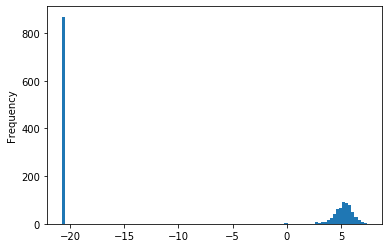

In [70]:
(X2.iloc[:,1]+0.000000001).apply(np.log).plot.hist(bins=100)

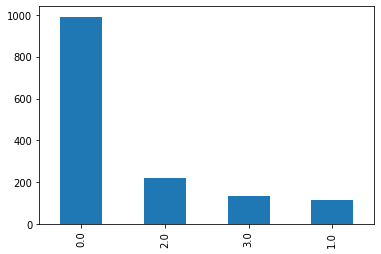

In [71]:
X2.iloc[:,2].value_counts().plot.bar()

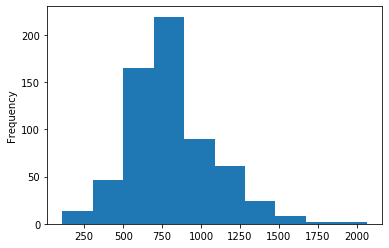

In [72]:
X2.loc[X2['2ndFlrSF']>0,'2ndFlrSF'].plot.hist()

In the end of the day we have different ways to improve the model and data. We gonna talk about these preprocessing ways next week.

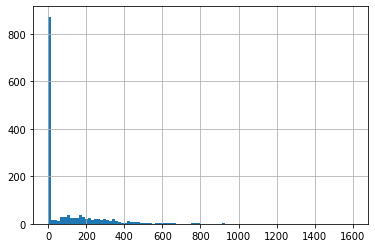

In [73]:
X2.MasVnrArea.hist(bins=100)

 Assunption is violated. In this specific case I would've split my data

# Exogeneity of residuals

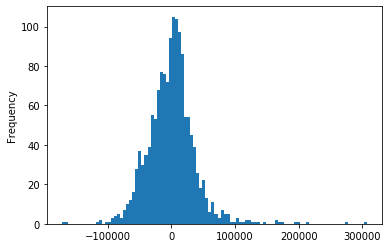

In [74]:
resid.plot.hist(bins=100)

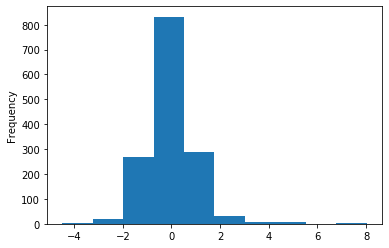

In [75]:
((resid-resid.mean())/resid.std()).plot.hist()

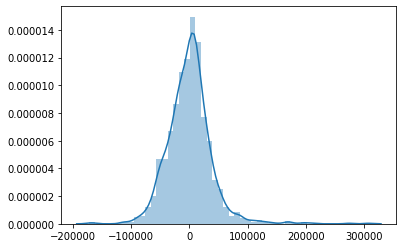

In [76]:
sns.distplot(resid)

In [77]:
from scipy.stats import kstest

In [78]:
kstest(resid, 'norm') # Goodness of fit, or whether our series follow specific distribution

KstestResult(statistic=0.508219178022923, pvalue=0.0)

H0: resid follows Norm

H1: resid doesn't follow Norm

In [79]:
from scipy.stats import probplot
import pylab

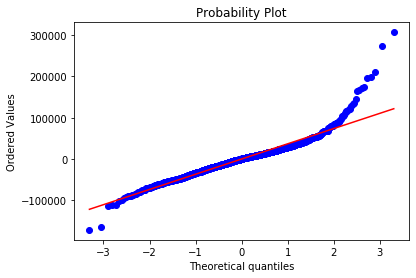

In [80]:
probplot(resid, dist='norm', plot=pylab);

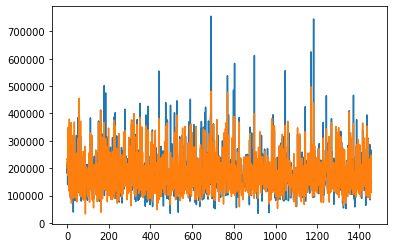

In [81]:
plt.plot(y)
plt.plot(y_pred)

In [82]:
resid.mean()

2.1947477625249184e-11

In [83]:
resid.std()

38259.29320638308

In [84]:
std_list=[]
for i in range(100):
    std_list.append(resid.sample(1000).std())
sum(std_list)/100

38116.90229311489

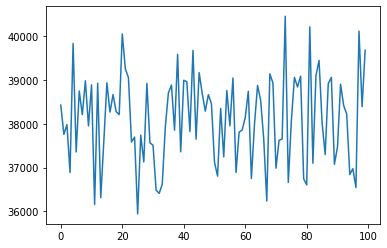

In [85]:
plt.plot(std_list)

# Conclusions

1. Multicollinearity assumption is satisfied (we made it happen)
2. No autocorrelation assumption is satisfied
3. Linearity - not really. We ended up with LinAlgError which tells us that there is a problem in the model.
4. Homoskedasticity - failed. The data should be split into groups 
5. Exogeneity failed. We see that we have strong outliers that need to be handled. The average error is 0, but std is not really stable. MOst likely after splitting the data into groups (see 4) and dealing with outliers in each group we will obtain all the assumptions (perhaps except the Linearity one) being satisfied.


Right now we can't use the model as it is for real prediction. But it can work to explain the relationships between variables in our dataset (describe, not predict)

# Another point of view on the problem that we've gonna talk about next week

In [86]:
from sklearn.decomposition import PCA

In [87]:
pca=PCA(0.8)

In [88]:
X2_new=(X2-X2.mean())/X2.std()

In [89]:
pca.fit(X2_new)

PCA(copy=True, iterated_power='auto', n_components=0.8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [90]:
pca.transform(X2_new).shape

(1460, 20)

In [91]:
modd=sm.OLS(y_new, add_constant(pca.transform(X2_new))).fit()

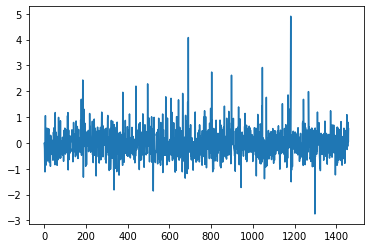

In [92]:
modd.resid.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae83556050>]],
      dtype=object)

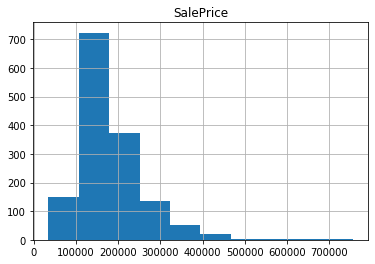

In [93]:
y.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae832b8d50>]],
      dtype=object)

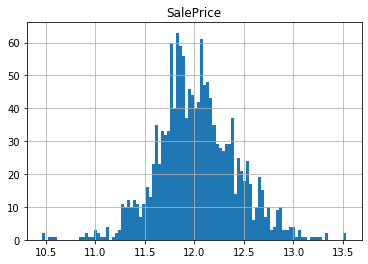

In [94]:
y.apply(np.log).hist(bins=100)

In [95]:
mod_log=sm.OLS(y.apply(np.log),add_constant(X2)).fit()
mod_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     144.4
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        01:37:45   Log-Likelihood:                 322.95
No. Observations:                1460   AIC:                            -579.9
Df Residuals:                    1427   BIC:                            -405.5
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.6112      0.029    399.387      0.000      11.554      11.668
LotArea               1.539e-06   6.03e-07      2.550      0.011    3.55e-07    2.72e-06
MasVnrArea               0.0001   3.99e-05      2.626      0.009    2.65e-05       0.000
BsmtExposure             0.0388      0.006      6.502      0.000       0.027       0.051
2ndFlrSF                 0.0004   2.77e-05     12.964      0.000       0.000       0.000
BsmtFullBath             0.0638      0.012      5.455      0.000       0.041       0.087
Fireplaces               0.0972      0.009     10.335      0.000       0.079       0.116
GarageCars               0.1514      0.009     16.914      0.000       0.134       0.169
ScreenPorch              0.0003    9.5e-05      3.623      0.000       0.000       0.001
BsmtFinTypeGLQ           0.0564      0.014      4.140      0.000       0.030       0.083
LotConfig_CulDSac        0.0638      0.022      2.923      0.004       0.021       0.107
BldgType_Twnhs          -0.2921      0.035     -8.427      0.000      -0.360      -0.224
BldgType_TwnhsE         -0.1711      0.023     -7.598      0.000      -0.215      -0.127
HouseStyle_1Story        0.1131      0.018      6.120      0.000       0.077       0.149
HouseStyle_2Story       -0.0939      0.021     -4.476      0.000      -0.135      -0.053
MasVnrType_BrkFace       0.0054      0.015      0.372      0.710      -0.023       0.034
Neighborhood_BrkSide    -0.3300      0.032    -10.226      0.000      -0.393      -0.267
Neighborhood_ClearCr    -0.1582      0.043     -3.696      0.000      -0.242      -0.074
Neighborhood_CollgCr    -0.0682      0.023     -2.915      0.004      -0.114      -0.022
Neighborhood_Edwards    -0.3271      0.027    -12.262      0.000      -0.379      -0.275
Neighborhood_Gilbert    -0.1371      0.028     -4.913      0.000      -0.192      -0.082
Neighborhood_IDOTRR     -0.5096      0.038    -13.429      0.000      -0.584      -0.435
Neighborhood_Mitchel    -0.2220      0.033     -6.726      0.000      -0.287      -0.157
Neighborhood_NAmes      -0.2381      0.022    -10.749      0.000      -0.282      -0.195
Neighborhood_NWAmes     -0.1423      0.029     -4.920      0.000      -0.199      -0.086
Neighborhood_NoRidge     0.0519      0.038      1.380      0.168      -0.022       0.126
Neighborhood_NridgHt     0.2223      0.028      7.863      0.000       0.167       0.278
Neighborhood_OldTown    -0.3749      0.026    -14.339      0.000      -0.426      -0.324
Neighborhood_SWISU      -0.2388      0.044     -5.383      0.000      -0.326      -0.152
Neighborhood_Sawyer     -0.2649      0.029     -9.079      0.000      -0.322      -0.208
Neighborhood_SawyerW    -0.1325      0.030     -4.374      0.000      -0.192      -0.073
Neighborhood_StoneBr     0.2322      0.043      5.411    

In [96]:
mod_log.predict(add_constant(X2).iloc[-1:])

1459    11.62775
dtype: float64

In [97]:
np.exp(11.62775)

112167.66053517004

In [98]:
y.iloc[-1]

SalePrice    147500
Name: 1459, dtype: int64

In [99]:
X2.to_csv('final_output.csv',index=False)

Fitting linear regression

R^2: 0.7680640610897331 

Coefficients
-------------------------------------
Intercept: 98940.42328877696
LotArea: 0.41
MasVnrArea: 52.46
BsmtExposure: 11659.11
2ndFlrSF: 82.12
BsmtFullBath: 9585.07
Fireplaces: 16557.19
GarageCars: 23398.03
ScreenPorch: 57.4
BsmtFinTypeGLQ: 14783.76
LotConfig_CulDSac: 13142.63
BldgType_Twnhs: -53982.5
BldgType_TwnhsE: -42101.25
HouseStyle_1Story: 33619.57
HouseStyle_2Story: -20407.48
MasVnrType_BrkFace: -7306.27
Neighborhood_BrkSide: -51896.69
Neighborhood_ClearCr: -47814.1
Neighborhood_CollgCr: -24289.22
Neighborhood_Edwards: -58105.55
Neighborhood_Gilbert: -36300.99
Neighborhood_IDOTRR: -69273.65
Neighborhood_Mitchel: -49641.23
Neighborhood_NAmes: -50663.28
Neighborhood_NWAmes: -35909.47
Neighborhood_NoRidge: 32630.94
Neighborhood_NridgHt: 59474.06
Neighborhood_OldTown: -62122.86
Neighborhood_SWISU: -48585.16
Neighborhood_Sawyer: -53534.28
Neighborhood_SawyerW: -29909.52
Neighborhood_StoneBr: 64866.54
Neighborhood_Timber: -

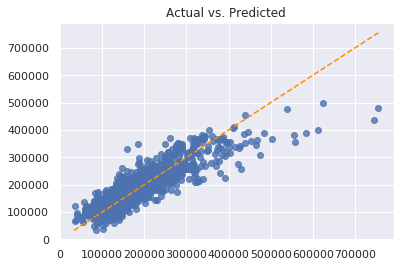

If non-linearity is apparent, consider adding a polynomial term 
		or using box-cox transformation to make X or y follow normal distribution



Building a correlation table


Parameters that are most likely VIOLATE linearity assumption and their correlation with SalePrice


BsmtFullBath    0.227122
ScreenPorch     0.111447
Name: SalePrice, dtype: float64


Parameters that are most likely FOLLOW linearity assumption and their correlation with SalePrice


LotArea         0.263843
MasVnrArea      0.472614
BsmtExposure    0.361863
2ndFlrSF        0.319334
Fireplaces      0.466929
GarageCars      0.640409
Name: SalePrice, dtype: float64


Assumption 2: Little to no multicollinearity among predictors


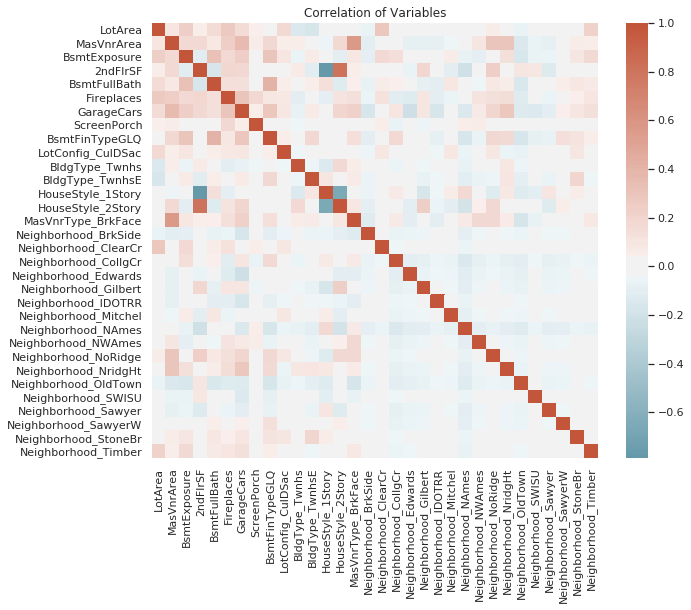

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
GarageCars: 8.775583817484671
2ndFlrSF: 8.178797384672968
HouseStyle_2Story: 5.012462853692528
HouseStyle_1Story: 4.831005296090246
LotArea: 2.866938891089091
Fireplaces: 2.619600359163426
MasVnrArea: 2.5997293934220584
MasVnrType_BrkFace: 2.4342367522924846
BsmtFullBath: 2.334273169531771
BsmtFinTypeGLQ: 2.251786078157455
BsmtExposure: 2.012760675336284
Neighborhood_NAmes: 1.91788047205255
Neighborhood_CollgCr: 1.8644417180187844
Neighborhood_NridgHt: 1.58578579359776
Neighborhood_NoRidge: 1.5005207105362386
Neighborhood_Gilbert: 1.4489101752953997
Neighborhood_NWAmes: 1.424717673557443
Neighborhood_OldTown: 1.3994915240782924
BldgType_TwnhsE: 1.34366597652004
Neighborhood_Timber: 1.3291907147258095
Neighborhood_Edwards: 1.3250237701667518
Neighborhood_Sawyer: 1.2945428538861237
Neighborhood_SawyerW: 1.289

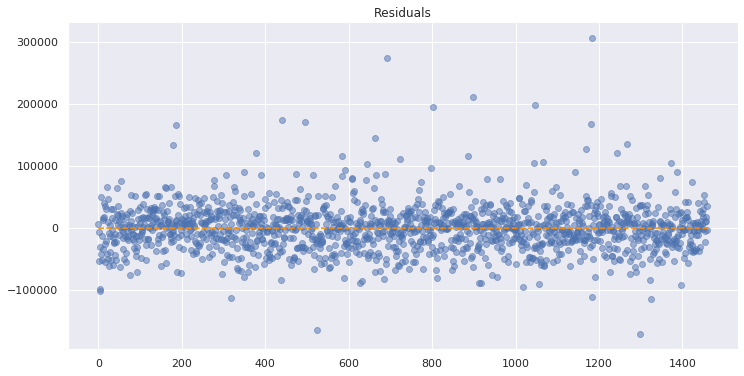

If heteroskedasticity is apparent, confidence intervals and predictions will be affected

Consider removing outliers and preprocessing features - nonlinear transformation can help


{'Lagrange Multiplier': 379.8491517668932,
 'pvalue for LM': 1.1632811910540556e-61,
 'F stats': 15.692964020095346,
 'pvalue for Fstats': 3.7743532809680115e-72}

Signs of positive autocorrelation 

Assumption potentially not satisfied 


Assumption 5: The error terms are kinda normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


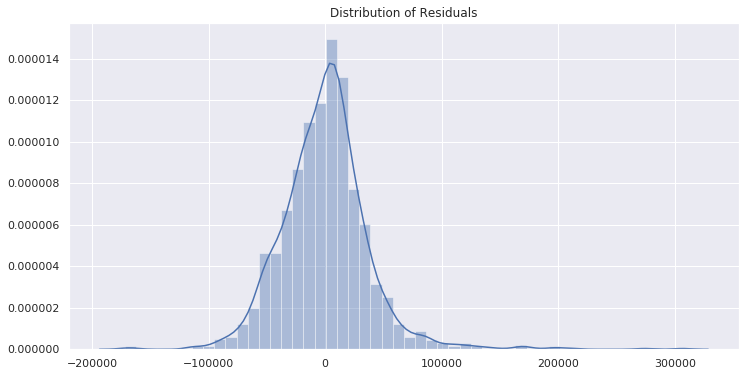


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Building a probability plot


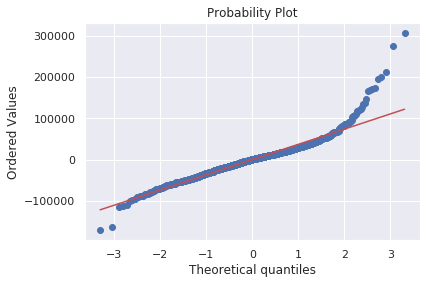


In your dataset you quite fat tails. You have 0.014 potential outliers (21 rows)


{'Satisfied': ['Multicollinearity', 'Autocorrelation'],
 'Potentially': ['Linearity', 'Autocorrelation', 'Sub-Normality'],
 'Violated': ['Normality']}

In [100]:
from Assumptions import Assumption_Tester_OLS as atols
atols(X2,y).run_all()